In [3]:
from os import path
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch


# Set Matplotlib Parameters
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=17)
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

/var/folders/gq/j0mm4vs16k7ftsbyhlr0sl8c0000gp/T/ipykernel_3294/2276989783.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['','0', '1', '2', '5', '14.3'])


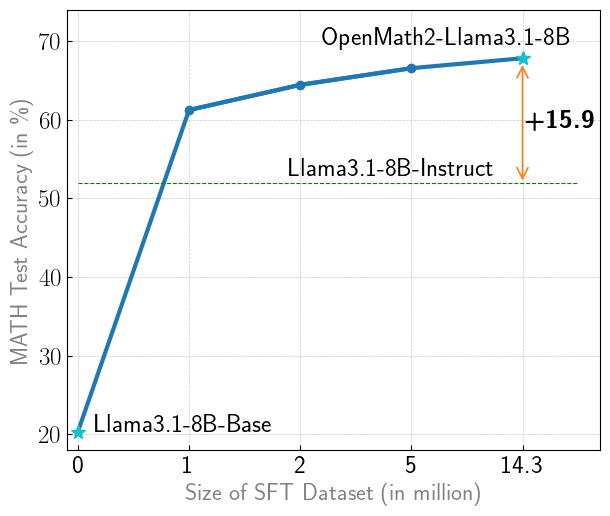

In [4]:

fig, ax = plt.subplots(figsize=(6, 5))  # A square figure with equal width and height
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


# Waiting for 5M and final run numbers
final_perf = 67.8
model_name = "OpenMath2-Llama3.1-8B"

# Data points
sft_size = np.array([0, 1, 2, 3, 4])
test_scores = np.array([20.3, 61.22, 64.42, 66.54, final_perf])

# Plot with markers only on the intermediate points
plt.errorbar(sft_size[1:-1], test_scores[1:-1], fmt='o', linestyle='-', color='#1f77b4', linewidth=3.0)  # Intermediate points with markers

# Plot the full line without markers
plt.plot(sft_size, test_scores, linestyle='-', color='#1f77b4', linewidth=3.0)  # Full line without markers
plt.ylim(18, 74)
plt.xlim(-0.1, 4.7)

plt.xlabel('Size of SFT Dataset (in million)', color="grey", weight="extra bold")
plt.ylabel('MATH Test Accuracy (in \%)', color="grey", weight="extra bold")
ax.set_xticklabels(['','0', '1', '2', '5', '14.3'])

# Llama3.1-8B-Base
plt.text(0.15, 20.3, 'Llama3.1-8B-Base')
plt.plot(0, 20.3, marker='*', markersize=10, color='#17becf')

# Llama3.1-8B-Instruct
ax.plot((0, 4.5), (51.9, 51.9), color='green', linestyle='--', linewidth=0.8)
plt.text(1.9, 52.9, 'Llama3.1-8B-Instruct')

# OpenMathLlama model
plt.plot(4, final_perf, marker='*', markersize=10, color='#17becf')
plt.text(2.2, 69.5, model_name)


arrow = FancyArrowPatch((4, 51.9), (4, final_perf - 0.5), mutation_scale=20, arrowstyle='<->', color='#ff7f0e', linewidth=1.2)

val = final_perf - 51.9
plt.text(4.02, 59.0, f'\\textbf{{+{val:.1f}}}')

# Add the arrow to the plot
ax.add_patch(arrow)

plt.tight_layout(pad=0.07)
plt.savefig("../plots/scaling_plot.jpg", format='jpg', dpi=300)
plt.savefig("../plots/scaling_plot.pdf", format='pdf', dpi=300)
plt.show()